문제 정의: 도매업 고객(wholesale customers) 데이터셋을 활용한 군집 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

[Step1]데이터 준비하기

In [3]:
# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path,header=0)

[Step2]데이터 탐색

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


[Step3]데이터 전처리

In [6]:
#군집 분석은 모든 속성이 x(정답 y는 없음)

X = df.iloc[:,:] #전체 데이터 사용
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [10]:
#데이터 정규화

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


[Step4]k-means 군집 모형 - sklearn 사용

In [11]:
#sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# 모형 객체 생성 클러스터 개수 5개 지정

kmeans = cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)

In [12]:
#모형 학습
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
#예측 (군집)
cluster_label = kmeans.labels_
print(cluster_label)

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 0 3 3 3 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 1 3 3 0 0 3 3 0 0 1 3 0 0 3 1 3 3 0 1 0 3 0 0 0 0 0 3
 3 0 0 3 0 0 0 3 3 0 3 1 1 0 0 0 0 0 1 0 3 0 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 4 0 4 0
 0 0 0 3 3 0 0 0 3 0 0 2 3 2 2 3 3 2 2 2 3 2 2 2 3 2 1 2 2 3 2 3 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 3 2 3 2 2 2 2 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 2 3
 2 3 3 2 3 3 3 3 3 3 3 2 2 3 2 2 3 2 2 3 2 2 2 3 2 2 2 2 2 4 2 2 2 2 2 3 2
 1 2 3 2 2 2 2 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 3 3 0 3 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]


In [15]:
# 예측 결과를 데이터프레임에 추가
df['cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3


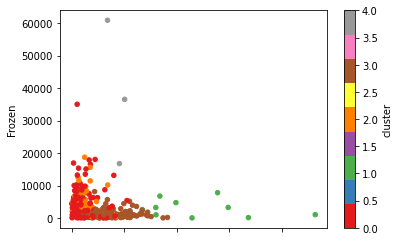

In [18]:
#그래프로 표현 - 시각화
df.plot(kind='scatter',x='Grocery',y='Frozen',c='cluster',cmap='Set1')
plt.show()

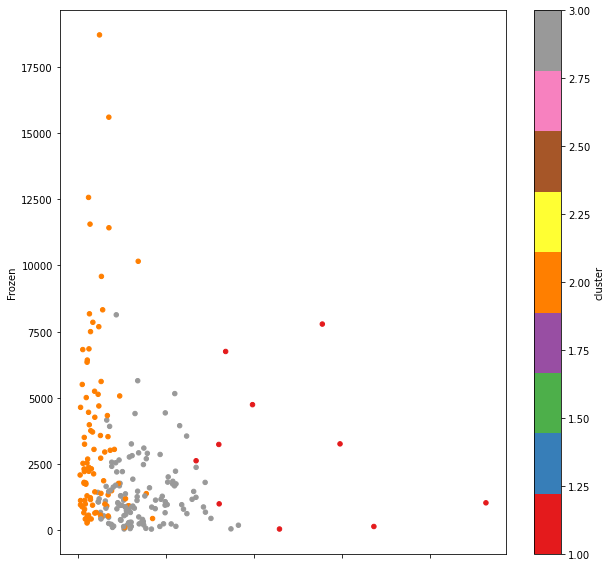

In [23]:
#큰 값으로 구성된 클러스터(0,4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석

mask = (df['cluster']==0) | (df['cluster']==4)
ndf = df[~mask] # ~ -> not !
ndf.plot(kind='scatter',x='Grocery',y='Frozen',c='cluster',cmap='Set1',figsize=(10,10))
plt.show()